In [ ]:
Pkg.resolve() # Installiert alle dependiencies aus Project.toml auf dem Rechner. Muss nur einmal ausgeführt werden.

: 

In [2]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.status()

  Activating project at `c:\Users\Herbert\Documents\GitHub\AMO_Project`
┌ Warning: The project dependencies or compat requirements have changed since the manifest was last resolved.
│ It is recommended to `Pkg.resolve()` or consider `Pkg.update()` if necessary.
└ @ Pkg.API C:\workdir\usr\share\julia\stdlib\v1.8\Pkg\src\API.jl:1535
Precompiling project...
  ✓ RangeArrays
  ✓ Calculus
  ✓ DefaultApplication
  ✓ SentinelArrays
  ✓ PDMats
  ✓ LaTeXStrings
  ✓ IteratorInterfaceExtensions
  ✓ IndirectArrays
  ✓ TensorCore
  ✓ StatsAPI
  ✓ Contour
  ✓ CEnum
  ✓ Pipe
  ✓ UnPack
  ✓ FixedPointNumbers
  ✓ FillArrays
  ✓ OpenLibm_jll
  ✓ Measures
  ✓ ArgCheck
  ✓ InverseFunctions
  ✓ WoodburyMatrices
  ✓ CompilerSupportLibraries_jll
  ✓ IterTools
  ✓ PkgVersion
  ✓ MutableArithmetics
  ✓ Grisu
  ✓ Compat
  ✓ StringManipulation
  ✓ MacroTools
  ✓ OrderedCollections
  ✓ Observables
  ✓ DataValueInterfaces
  ✓ RealDot
  ✓ Unzip
  ✓ Requires
  ✓ Reexport
  ✓ IniFile
  ✓ Pidfile
  ✓ DocStringExtension

Status `C:\Users\Herbert\Documents\GitHub\AMO_Project\Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.2
  [aaaa29a8] Clustering v0.14.3
  [a9b2a840] Complementarity v0.9.0
  [a93c6f00] DataFrames v1.4.4
  [864edb3b] DataStructures v0.18.13
  [b4f34e82] Distances v0.10.7
  [31c24e10] Distributions v0.25.80
  [5789e2e9] FileIO v1.16.0
⌃ [87dc4568] HiGHS v1.4.1
  [7073ff75] IJulia v1.24.0
  [916415d5] Images v0.25.2
  [b6b21f68] Ipopt v1.1.0
  [c8e1da08] IterTools v1.4.0
⌃ [4076af6c] JuMP v1.6.0
⌃ [b8f27783] MathOptInterface v1.11.4
  [8314cec4] PGFPlotsX v1.5.3
  [f0f68f2c] PlotlyJS v0.18.10
⌃ [91a5bcdd] Plots v1.38.2
  [67491407] Polyhedra v0.7.5
  [f3b207a7] StatsPlots v0.15.4
  [fdbf4ff8] XLSX v0.8.4
  [9a3f8284] Random
  [10745b16] Statistics
Info Packages marked with ⌃ have new versions available and may be upgradable.
Warning The project dependencies or compat requirements have changed since the manifest was last resolved. It is recommended to `Pkg.resolve()` or consider `Pkg.update

In [61]:
# die pakete die wir für dieses Notebook brauchen
using JuMP
using Plots
using XLSX
using DataFrames
using Complementarity
using Ipopt
using Distributions
using CSV


In [149]:
# Importing Winddata (100 Scenarios)
df = CSV.read("./resources/scen_zone1.csv", DataFrame)
data = vec(Array(df[1,2:end]))
print(data)
print(mean(data))

[0.384460432271812, 0.507700265124861, 0.464001467924984, 0.476854387845798, 0.480010190535918, 0.354536609476722, 0.603020114597728, 0.636560532769823, 0.470492310041842, 0.511492809732616, 0.60638890219245, 0.416816041022155, 0.490449714620625, 0.62607518883265, 0.624891767890761, 0.453345920245346, 0.473866968479603, 0.463208901473906, 0.480926612017417, 0.70697671794577, 0.502124556335751, 0.61104251710533, 0.551822930641098, 0.364298633063975, 0.626912769122171, 0.541000770704032, 0.487075409084087, 0.627998779960267, 0.452508837759483, 0.459935108053126, 0.626003532317345, 0.618834487454869, 0.761322503928748, 0.546257951351848, 0.560171478792829, 0.381015335647094, 0.684417161340814, 0.52661461863108, 0.475870850785708, 0.561332103768985, 0.467410458056293, 0.583709708358212, 0.674227732035525, 0.549045301772402, 0.522676399076547, 0.530222776576963, 0.415527349748816, 0.650324744520953, 0.571348195987917, 0.415865689147564, 0.535395481571909, 0.577562488327419, 0.54471261273559

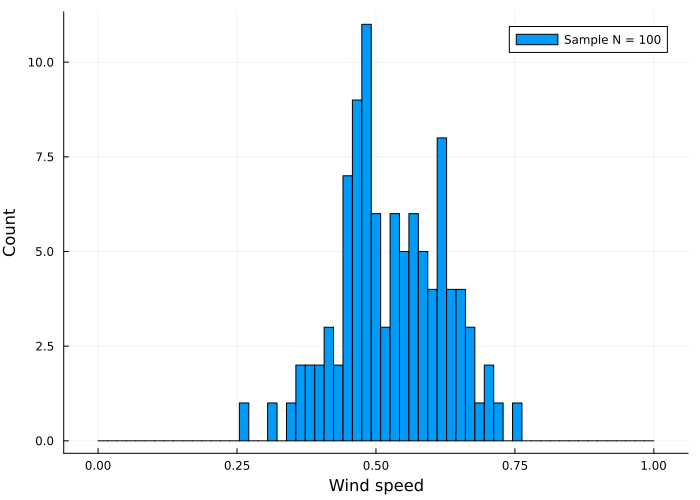

In [152]:
histogram(
    data, 
    label="Sample N = "*string(100),
    xlabel="Wind speed",
    ylabel="Count",
    bins = range(0, 1, length=60),
    legend=:topright,
    size=(700,500),
)

In [154]:
# Estimating Weibull Distribution from given scenarios (hour 12)
weibull_est = fit_mle(Weibull,data)


Weibull{Float64}(α=6.14089895906193, θ=0.5690537808045645)

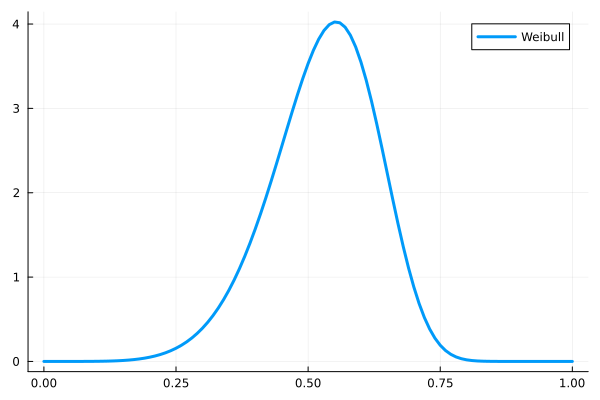

In [155]:
#Plot pdf of Estimations
x = 0.0:0.01:1
plot(x,pdf.(weibull_est,x),label="Weibull",lw=3)

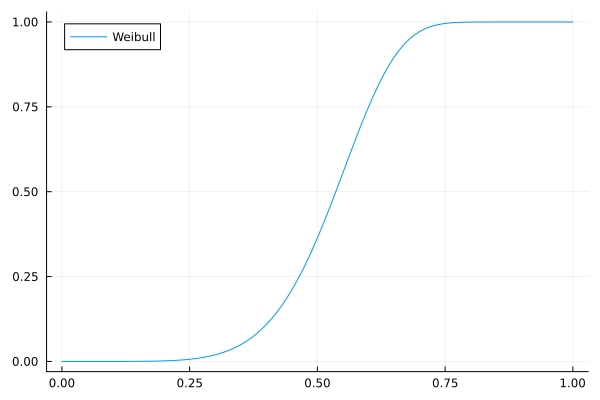

In [157]:
#Plot cdf of Estimations
x = 0.0:0.01:1
plot(x,cdf.(weibull_est,x),label="Weibull")

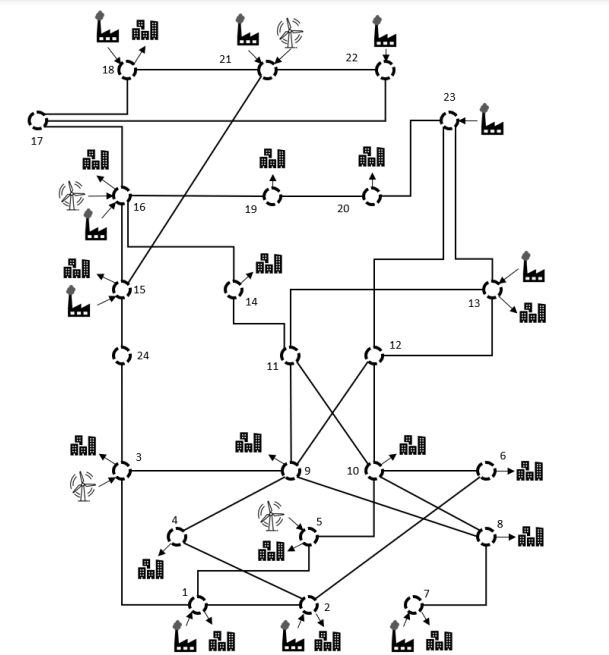

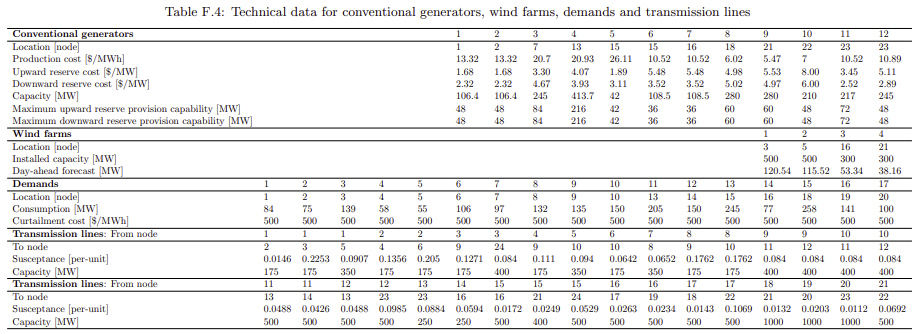

In [19]:
display("image/png", read("./resources/Model_visuell.PNG"))
display("image/png", read("./resources/Model_table.PNG"))


In [4]:
wind = Weibull(2.0, 5.0)

Weibull{Float64}(α=2.0, θ=5.0)

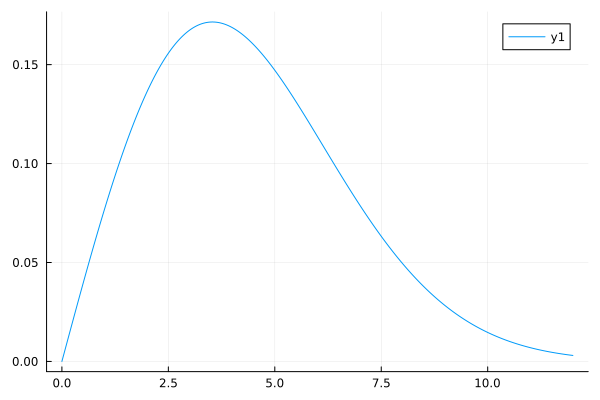

In [6]:
x = 0.0:0.01:12.0
plot(x, pdf.(wind,x))

In [3]:
## Create the model: fixed wind generation, no transmission constraints, no reserve, bid equal to curtailment cost:  results in a one stage optimizing problem.
generators = Dict(
    :G1 => Dict(
        :capacity => 106.4,
        :offer => 13.32,
        :reserve_up_cost => 1.68,
        :reserve_down_cost => 2.32,
        :reserve_up_cap => 48,
        :reserve_down_cap => 48 
    ),
    :G2 => Dict(
        :capacity => 106.4,
        :offer => 13.32,
        :reserve_up_cost => 1.68,
        :reserve_down_cost => 2.32,
        :reserve_up_cap => 48,
        :reserve_down_cap => 48 
    ),
    :G3 => Dict(
        :capacity => 245,
        :offer => 20.7,
        :reserve_up_cost => 3.3,
        :reserve_down_cost => 4.67,
        :reserve_up_cap => 84,
        :reserve_down_cap => 84 
    ),
    :G4 => Dict(
        :capacity => 413.7,
        :offer => 20.93,
        :reserve_up_cost => 4.07,
        :reserve_down_cost => 3.93,
        :reserve_up_cap => 216,
        :reserve_down_cap => 216 
    ),
    :G5 => Dict(
        :capacity => 42,
        :offer => 26.11,
        :reserve_up_cost => 1.89,
        :reserve_down_cost => 3.11,
        :reserve_up_cap => 42,
        :reserve_down_cap => 42 
    ),
    :G6 => Dict(
        :capacity => 108.5,
        :offer => 10.52,
        :reserve_up_cost => 5.48,
        :reserve_down_cost => 3.52,
        :reserve_up_cap => 36,
        :reserve_down_cap => 36 
    ),
    :G7 => Dict(
        :capacity => 108.5,
        :offer => 10.52,
        :reserve_up_cost => 5.48,
        :reserve_down_cost => 3.52,
        :reserve_up_cap => 36,
        :reserve_down_cap => 36 
    ),
    :G8 => Dict(
        :capacity => 280,
        :offer => 6.02,
        :reserve_up_cost => 4.98,
        :reserve_down_cost => 5.02,
        :reserve_up_cap => 60,
        :reserve_down_cap => 60 
    ),
    :G9 => Dict(
        :capacity => 280,
        :offer => 5.47,
        :reserve_up_cost => 5.53,
        :reserve_down_cost => 4.97,
        :reserve_up_cap => 48,
        :reserve_down_cap => 60 
    ),
    :G10 => Dict(
        :capacity => 210,
        :offer => 7,
        :reserve_up_cost => 8,
        :reserve_down_cost => 6,
        :reserve_up_cap => 48,
        :reserve_down_cap => 48 
    ),
    :G11 => Dict(
        :capacity => 217,
        :offer => 10.52,
        :reserve_up_cost => 3.45,
        :reserve_down_cost => 2.52,
        :reserve_up_cap => 72,
        :reserve_down_cap => 72 
    ),
    :G12 => Dict(
        :capacity => 245,
        :offer => 10.89,
        :reserve_up_cost => 5.11,
        :reserve_down_cost => 2.89,
        :reserve_up_cap => 48,
        :reserve_down_cap => 48 
    )
)
wind = Dict(
    :W1 => Dict(
        :capacity => 500,
        :forecast => 120.54
    ),
    :W2 => Dict(
        :capacity => 500,
        :forecast => 115.52
    ),
    :W3 => Dict(
        :capacity => 300,
        :forecast => 53.34
    ),
    :W4 => Dict(
        :capacity => 300,
        :forecast => 38.16
    )
)

loads = Dict(
   :D1 => Dict(
    :consumption => 84,
    :bid => 500 
   ),
   :D2 => Dict(
    :consumption => 75,
    :bid => 500
   ),
   :D3 => Dict(
    :consumption => 139,
    :bid => 500
   ),
   :D4 => Dict(
    :consumption => 58,
    :bid => 500
   ),
   :D5 => Dict(
    :consumption => 55,
    :bid => 500
   ),
   :D6 => Dict(
    :consumption => 106,
    :bid => 500
   ),
   :D7 => Dict(
    :consumption => 97,
    :bid => 500
   ),
   :D8 => Dict(
    :consumption => 132,
    :bid => 500
   ),
   :D9 => Dict(
    :consumption => 135,
    :bid => 500
   ),
   :D10 => Dict(
    :consumption => 150,
    :bid => 500
   ),
   :D11 => Dict(
    :consumption => 205,
    :bid => 500
   ),
   :D12 => Dict(
    :consumption => 150,
    :bid => 500
   ),
   :D13 => Dict(
    :consumption => 245,
    :bid => 500
   ),
   :D14 => Dict(
    :consumption => 77,
    :bid => 500
   ),
   :D15 => Dict(
    :consumption => 258,
    :bid => 500
   ),
   :D16 => Dict(
    :consumption => 141,
    :bid => 500
   ),
   :D17 => Dict(
    :consumption => 100,
    :bid => 500
   )
)




Dict{Symbol, Dict{Symbol, Int64}} with 17 entries:
  :D4  => Dict(:bid=>500, :consumption=>58)
  :D12 => Dict(:bid=>500, :consumption=>150)
  :D13 => Dict(:bid=>500, :consumption=>245)
  :D16 => Dict(:bid=>500, :consumption=>141)
  :D2  => Dict(:bid=>500, :consumption=>75)
  :D1  => Dict(:bid=>500, :consumption=>84)
  :D6  => Dict(:bid=>500, :consumption=>106)
  :D7  => Dict(:bid=>500, :consumption=>97)
  :D9  => Dict(:bid=>500, :consumption=>135)
  :D3  => Dict(:bid=>500, :consumption=>139)
  :D17 => Dict(:bid=>500, :consumption=>100)
  :D5  => Dict(:bid=>500, :consumption=>55)
  :D14 => Dict(:bid=>500, :consumption=>77)
  :D10 => Dict(:bid=>500, :consumption=>150)
  :D11 => Dict(:bid=>500, :consumption=>205)
  :D15 => Dict(:bid=>500, :consumption=>258)
  :D8  => Dict(:bid=>500, :consumption=>132)

In [12]:
m = Model(HiGHS.Optimizer)

@variable(m, 0 <= pg[i in keys(generators)] <= generators[i][:capacity])
@variable(m, 0 <= pw[i in keys(wind)] <= wind[i][:forecast] )
@variable(m, 0 <= pd[i in keys(loads)] <= loads[i][:consumption])
@constraint(m, λ, sum(pd) - sum(pw) - sum(pg) == 0)

@objective(m, Max, 
    sum(pd[i]*loads[i][:bid] for i in keys(loads)) - 
    sum(pg[i]*generators[i][:offer] for i in keys(generators))
)

print(m)

In [13]:
optimize!(m)

Running HiGHS 1.4.0 [date: 1970-01-01, git hash: bcf6c0b22]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
1 rows, 33 cols, 33 nonzeros
1 rows, 11 cols, 11 nonzeros
1 rows, 11 cols, 11 nonzeros
Presolve : Reductions: rows 1(-0); columns 11(-22); elements 11(-22)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
          1    -1.0842394260e+06 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 1
Objective value     :  1.0842394260e+06
HiGHS run time      :          0.00


In [18]:
println("SW = ", objective_value(m))

for i in keys(generators)
    println(i, " = ", value(pg[i]))
end

for i in keys(wind)
    println(i, " = ", value(pw[i]))
end

for i in keys(loads)
    println(i, " = ", value(pd[i]))
end

println("λ = ", shadow_price(λ))

SW = 1.084239426e6
G3 = 217.63999999999987
G9 = 280.0
G12 = 245.0
G8 = 280.0
G2 = 106.4
G11 = 217.0
G6 = 108.5
G5 = 0.0
G10 = 210.0
G1 = 106.4
G7 = 108.5
G4 = 0.0
W3 = 53.34
W4 = 38.16
W1 = 120.54
W2 = 115.52
D4 = 58.0
D12 = 150.0
D13 = 245.0
D16 = 141.0
D2 = 75.0
D1 = 84.0
D6 = 106.0
D7 = 97.0
D9 = 135.0
D3 = 139.0
D17 = 100.0
D5 = 55.0
D14 = 77.0
D10 = 150.0
D11 = 205.0
D15 = 258.0
D8 = 132.0
λ = 20.7


In [15]:
println("λ = ", shadow_price(λ))

λ = 20.7
